In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline , interp1d
from scipy.optimize import curve_fit
from heapq import nsmallest
from scipy.interpolate import LSQUnivariateSpline
from scipy.interpolate import UnivariateSpline


In [2]:
#Configuraciones iniciales
FILE = 'zetaAur-eclipse_B_2019_11_15_23_52_17.dat'
LMIN = 3931.66
LMAX = 3935.66
LLIN = 3933.66
RANG = 0.2
NSPL = 200

In [3]:
#importar datos
Data = pd.read_csv('zetaAur-eclipse_B_2019_11_15_23_52_17.dat', delimiter = ' ', header = None)
Data.columns = ['L','I', 'C']
Data['L'] = Data['L']*10 #unidades en Amstrong

#Recortamos en el rango de la línea K
New_Data = Data[(Data['L'] >= LMIN) & (Data['L'] <= LMAX)] #Se encuentran los valores cercanos a la config inicial
L_min = New_Data['L'].min()
L_max = New_Data['L'].max()

In [4]:
lamnda = New_Data['L']
Intensidad = New_Data['I']

def ReductorDatos(lamnda, Intensidad,start,end,paso):
    
    List_pasos = np.arange(start,end, paso)
    Datos_agrupados = {}
    Datos_agrupados['L'] = []
    Datos_agrupados['I'] = []
    for i in range(1,len(List_pasos)):
        Agrup_lamnda = lamnda[(lamnda >= List_pasos[i-1]) & (lamnda < List_pasos[i])]
        
        Datos_agrupados['L'].append(Agrup_lamnda)
        Datos_agrupados['I'].append(Intensidad[  Agrup_lamnda.index  ]) # Agrup_lamnda.index  obtiene la llave compartida
    return Datos_agrupados

In [6]:
ajustedatos = ReductorDatos(New_Data['L'], New_Data['I'],3931.4,3935.9,0.09)

In [12]:
newdatosL = [] 
newdatosI = []
for i in range(len(ajustedatos['I'])):
    newdatosL.append(ajustedatos['L'][i].median())
    newdatosI.append(ajustedatos['I'][i].median())
    newdatosI = [x for x in newdatosI if str(x) != 'nan']
    newdatosL = [x for x in newdatosL if str(x) != 'nan']
print(newdatosI)

[0.0031144509625443584, 0.0028479127452761223, 0.002148045937962422, 0.0027384448378156424, 0.0029853460781689703, 0.0025118934064661427, 0.0031371947788917526, 0.002327541573449805, 0.0014512655538271634, 0.0023995832819423066, 0.001419302087643487, 0.002420357648598449, 0.0013690089831473232, 0.0012126742858970634, 0.0013776559020614474, 0.001960972390384652, 0.0024324710407892455, 0.004962233616246572, 0.004338335527498076, 0.005211967335307878, 0.004681393308491422, 0.004097086054864956, 0.0028730951588137725, 0.0029066862554802527, 0.003217797024019072, 0.002627990042086701, 0.004297937492107352, 0.0037344639517713123, 0.004567635191108445, 0.005904640967420166, 0.005461192507986039, 0.004406717306351106, 0.0057118422111943, 0.0027981736670986256, 0.0023016487418192804, 0.00327680300155202, 0.002691042028429431, 0.002157122985681941, 0.0019611067328913004, 0.0018446123631686664, 0.001424224745915502, 0.0018416785361988434, 0.0016945834666053478, 0.002825192900628018, 0.00299810229

In [10]:
cs = CubicSpline(newdatosL,newdatosI, bc_type = '')
xs =  np.linspace(L_min,  L_max, 100)

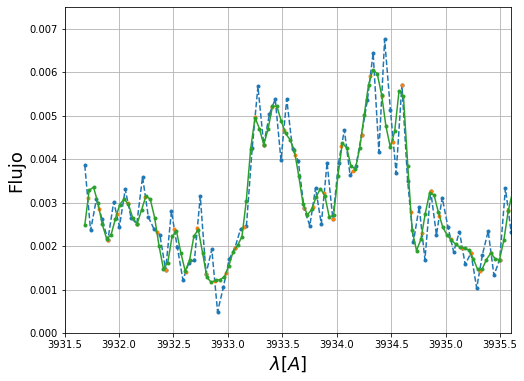

In [11]:
plt.figure(figsize = [8,6])
plt.plot(New_Data['L'],New_Data['I'],marker='.', ls='--')
plt.plot(newdatosL,newdatosI,marker='.', ls='')
plt.plot(xs,cs(xs),marker='.', ls='-')
plt.grid()
plt.xlim(3931.5, 3935.6)
plt.ylim(0, 0.0075)
plt.ylabel("Flujo",fontsize=18)
plt.xlabel("$\lambda [A]$",fontsize=18)
plt.show()